# Groupment/clustering avec données augmentées

Dans ce notebook on essaie des méthodes de groupement (AgglomerativeClustering, DBSCAN, GaussianMixture) sur les données augmentées

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import wkt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
csv_path = '../../data/processed/processed_enhanced_data_with_presence.csv'
# Lecture du GeoDataFrame à partir du CSV
gdf = pd.read_csv(csv_path)

# Applications de paramètres liés à la geometry du GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
gdf.set_crs(epsg=2056, inplace=True)
gdf.set_index('idx', inplace=True)

gdf.head()

,geometry,Altitude,NaturalHabitat,SoilType,WaterRetention,NutrientContent,WaterPermeability,Temperature,Presence,Count
idx,,,,,,,,,,
35,"POLYGON ((2485071.58 1109261.72, 2486071.58 11...",363.5148,62.0,"orthic Luvisol; eutric, calcaric Cambisol",4.0,6.0,4.0,5.2,0,0
36,"POLYGON ((2485071.58 1110261.72, 2486071.58 11...",358.9348,62.0,"orthic Luvisol; eutric, calcaric Cambisol",4.0,6.0,4.0,5.2,0,0
261,"POLYGON ((2486071.58 1109261.72, 2487071.58 11...",415.6684,62.0,"eutric, dystric Cambisol; eutric Regosol; spod...",4.0,4.0,4.0,5.3,0,0
262,"POLYGON ((2486071.58 1110261.72, 2487071.58 11...",368.5936,62.0,"eutric, dystric Cambisol; eutric Regosol; spod...",4.0,4.0,4.0,5.3,0,0
263,"POLYGON ((2486071.58 1111261.72, 2487071.58 11...",352.9472,82.0,"orthic Luvisol; eutric, calcaric Cambisol",4.0,6.0,4.0,5.3,0,0


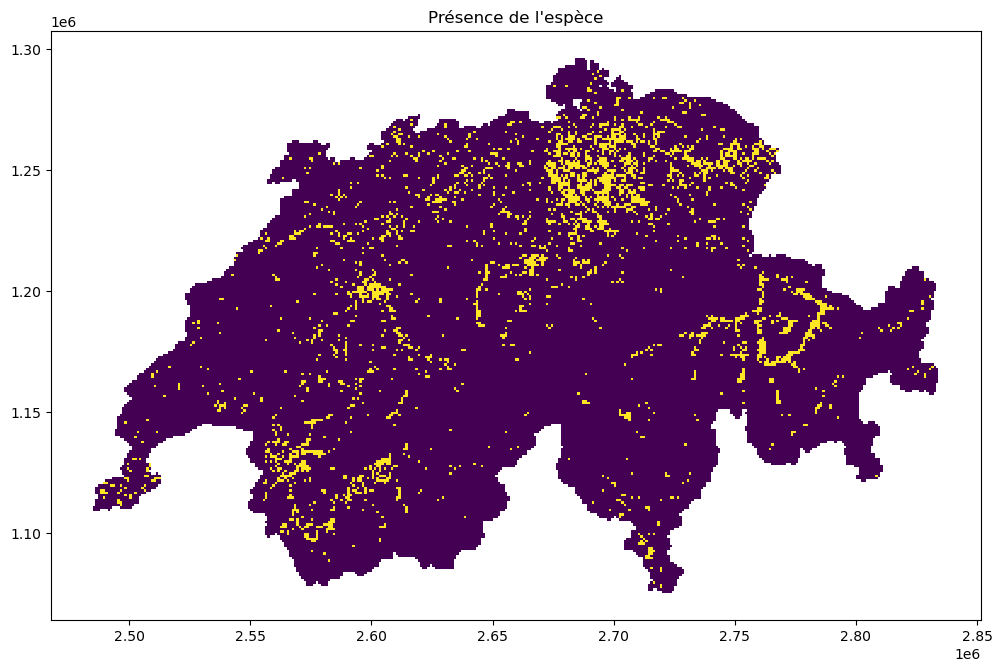

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(column='Presence', ax=ax, cmap='viridis')
plt.title('Présence de l\'espèce')
plt.show()

In [4]:
# Step 1: Select relevant features for clustering
features = gdf[['Altitude', 'WaterRetention', 'NutrientContent', 'WaterPermeability']]

# Step 2: Handle missing values using an imputer
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
gdf['cluster'] = dbscan.fit_predict(scaled_features)

# Step 5: Analyze the results
# Count points in each cluster
cluster_counts = gdf['cluster'].value_counts()
print(cluster_counts)

cluster
5     9098
10    3541
9     3025
3     2626
4     2454
      ... 
84       5
85       5
64       5
60       5
27       4
Name: count, Length: 93, dtype: int64


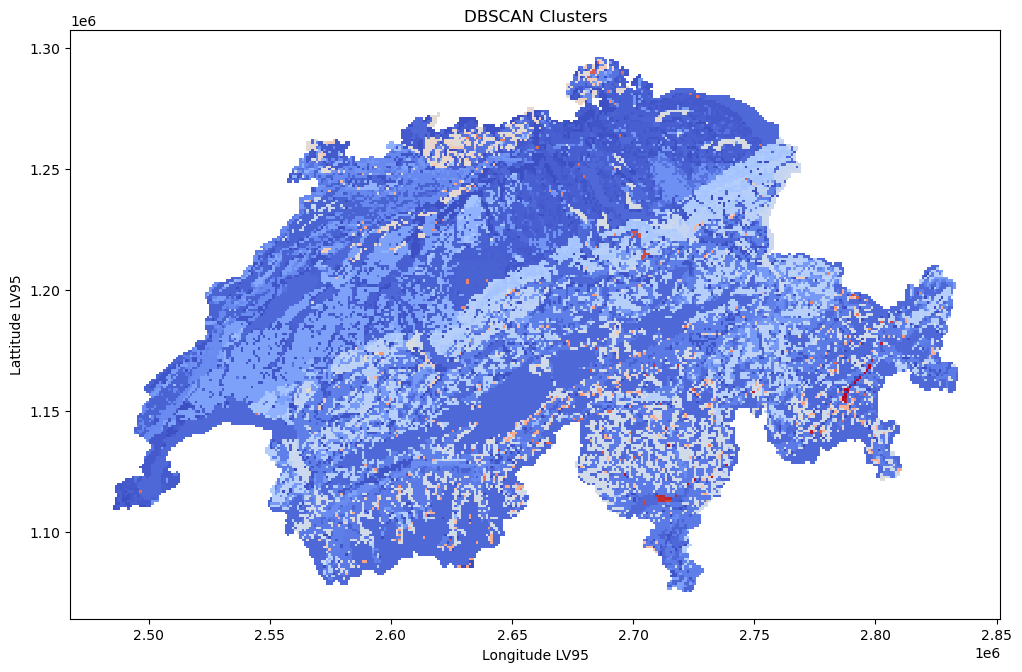

In [5]:
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='cluster', ax=ax, cmap='coolwarm')
plt.title("DBSCAN Clusters")
plt.xlabel("Longitude LV95")
plt.ylabel("Lattitude LV95")
plt.show()

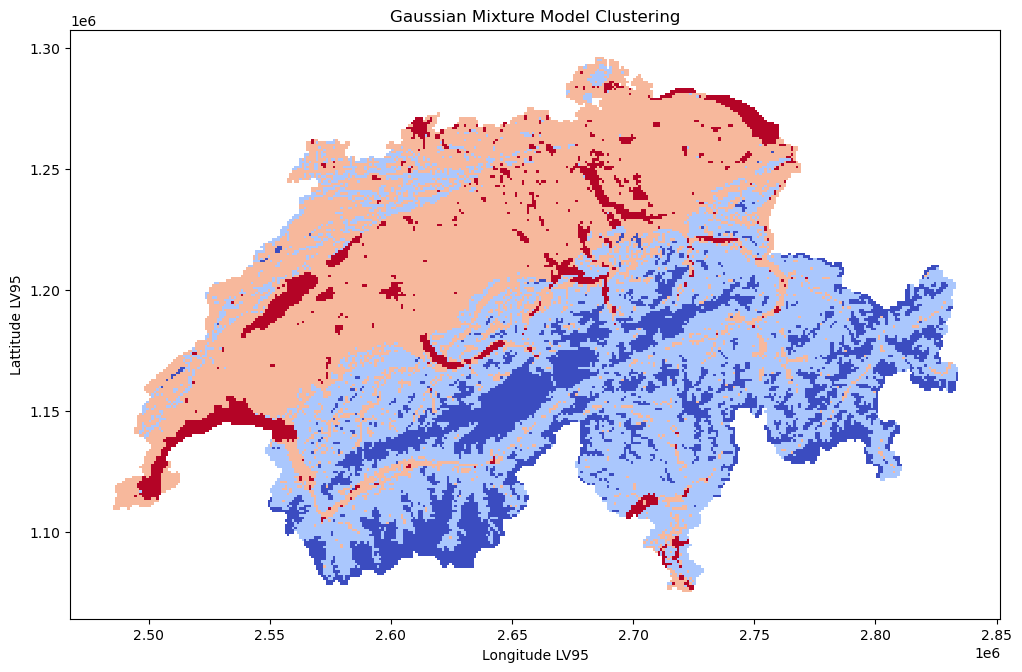

In [6]:
# Fit a Gaussian Mixture Model
n_components = 4
gmm = GaussianMixture(n_components=n_components)
gdf['cluster'] = gmm.fit_predict(scaled_features)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='cluster', ax=ax, cmap='coolwarm')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Longitude LV95")
plt.ylabel("Lattitude LV95")
plt.show()

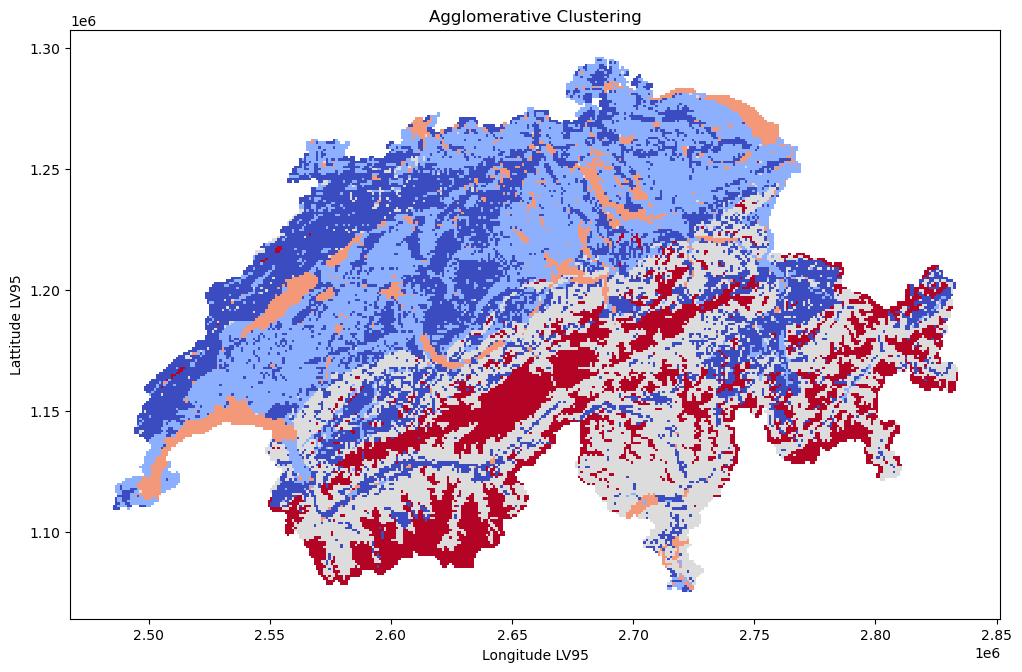

In [7]:
# Step 1: Fit Agglomerative Clustering
n_clusters = 5  # Set the number of clusters
agglo = AgglomerativeClustering(n_clusters=n_clusters)
gdf['cluster'] = agglo.fit_predict(scaled_features)

# Step 2: Plot the results
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='cluster', ax=ax, cmap='coolwarm')
plt.title("Agglomerative Clustering")
plt.xlabel("Longitude LV95")
plt.ylabel("Lattitude LV95")
plt.show()